## 1. Introduction

The goal of this project is to analyze whether there is a relationship between the **number of calories burned**, **gender**, and **age**.  
Understanding these relationships can provide valuable insights into how demographic factors influence energy expenditure and physical activity outcomes.  

By exploring patterns in calorie burn, this analysis aims to answer key questions such as:
- Do males and females burn calories at different rates?
- Does age affect the number of calories burned during physical activities?

The project involves data exploration, visualization, and statistical testing to determine whether the observed differences are significant.  
Ultimately, the findings can help inform personalized fitness recommendations and improve understanding of how age and gender impact metabolism and activity performance.


## 2. Data Exploration and Description
- Loading and inspecting the dataset.  
- Check data types, missing values, and summary statistics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


file_path = "/kaggle/input/life-style-data/Final_data.csv" 
df = pd.read_csv(file_path)

In [2]:
df.head

<bound method NDFrame.head of          Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0      34.91    Male        65.27        1.62   188.58   157.65        69.05   
1      23.37  Female        56.41        1.55   179.43   131.75        73.18   
2      33.20  Female        58.98        1.67   175.04   123.95        54.96   
3      38.69  Female        93.78        1.70   191.21   155.10        50.07   
4      45.09    Male        52.42        1.88   193.58   152.88        70.84   
...      ...     ...          ...         ...      ...      ...          ...   
19995  46.77  Female        98.31        1.90   199.20   148.18        63.72   
19996  40.38  Female        88.12        1.87   196.18   134.18        54.04   
19997  50.31    Male        46.20        1.67   163.34   157.92        61.65   
19998  52.36    Male        44.30        1.62   179.27   121.23        60.88   
19999  29.56    Male        58.63        1.61   198.07   121.74        72.05   

       Se

In [3]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [4]:
df.info

<bound method DataFrame.info of          Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0      34.91    Male        65.27        1.62   188.58   157.65        69.05   
1      23.37  Female        56.41        1.55   179.43   131.75        73.18   
2      33.20  Female        58.98        1.67   175.04   123.95        54.96   
3      38.69  Female        93.78        1.70   191.21   155.10        50.07   
4      45.09    Male        52.42        1.88   193.58   152.88        70.84   
...      ...     ...          ...         ...      ...      ...          ...   
19995  46.77  Female        98.31        1.90   199.20   148.18        63.72   
19996  40.38  Female        88.12        1.87   196.18   134.18        54.04   
19997  50.31    Male        46.20        1.67   163.34   157.92        61.65   
19998  52.36    Male        44.30        1.62   179.27   121.23        60.88   
19999  29.56    Male        58.63        1.61   198.07   121.74        72.05   

       

In [5]:
df.isnull().sum()

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

## 3. Exploratory Data Analysis (EDA)

3.1. Relationship Between Age and Calories Burned

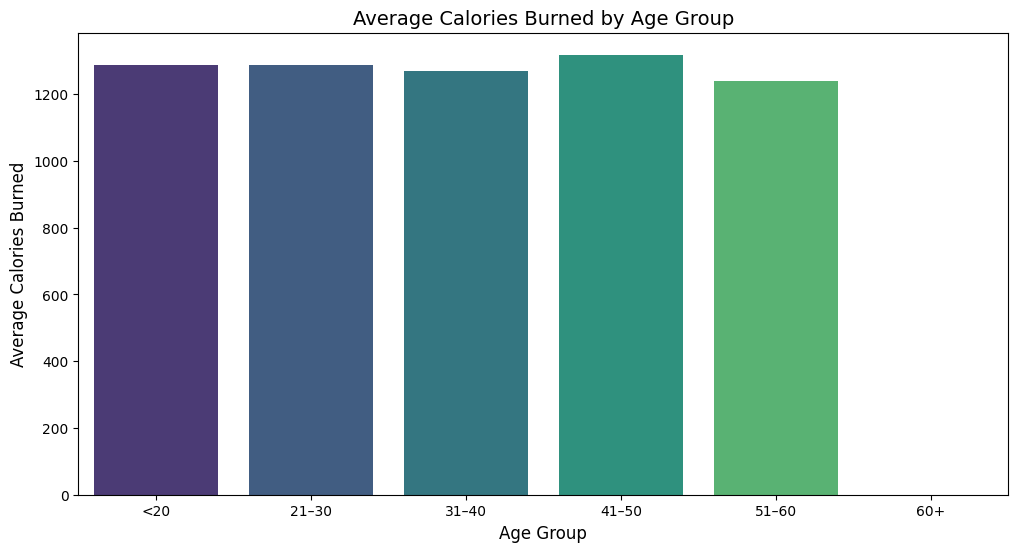

In [6]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '21–30', '31–40', '41–50', '51–60', '60+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

avg_calories = df.groupby('Age_Group')['Calories_Burned'].mean().reset_index()
avg_calories

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_calories, x='Age_Group', y='Calories_Burned', palette='viridis')
plt.title("Average Calories Burned by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Calories Burned", fontsize=12)
plt.show()

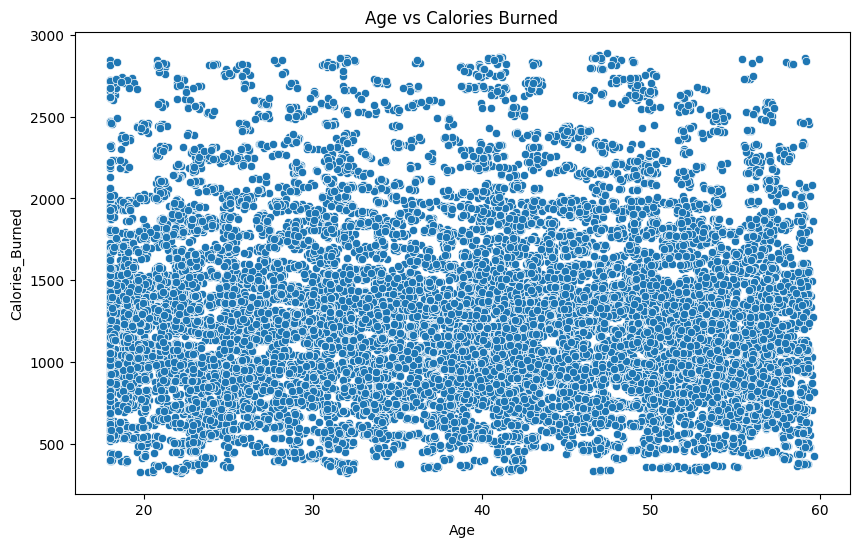

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Calories_Burned')
plt.title("Age vs Calories Burned")
plt.show()


The visualizations indicate that there is **no clear or strong relationship** between **age** and **calories burned**.  
The data shows only a **very small or negligible correlation**, suggesting that age does not significantly influence the number of calories burned.


In [8]:
df['Age'].corr(df['Calories_Burned'])

-0.021396131737567728

Observed value (-0.021) is very close to 0, meaning:


There is almost no linear relationship between age and calories burned in our dataset.


It’s essentially negligible, age does not strongly predict calories burned.
The correlation is very weak, so age alone doesn’t explain calorie differences. 

3.2. Relationship Between Age and Calories Burned

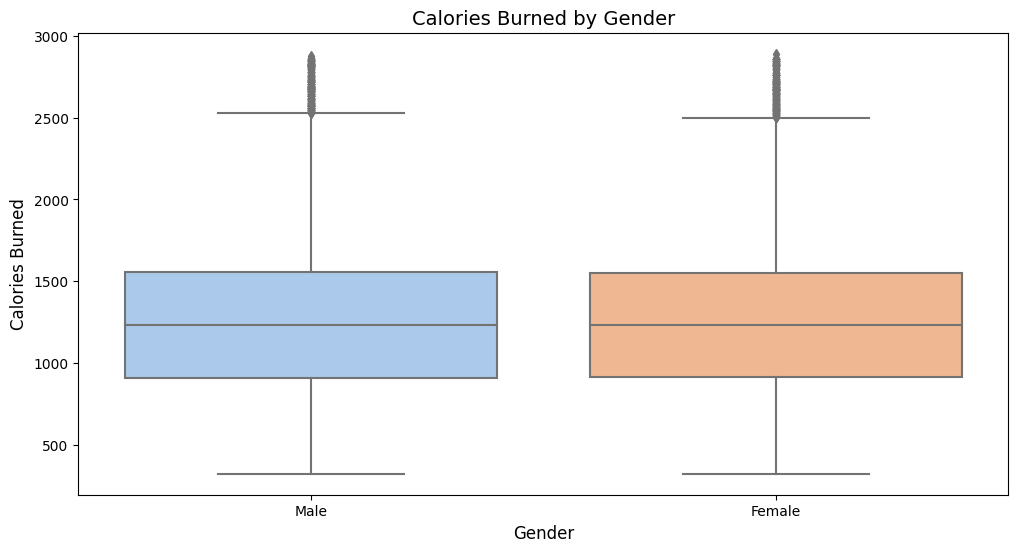

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Gender', y='Calories_Burned', palette='pastel')

plt.title("Calories Burned by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Calories Burned", fontsize=12)
plt.show()

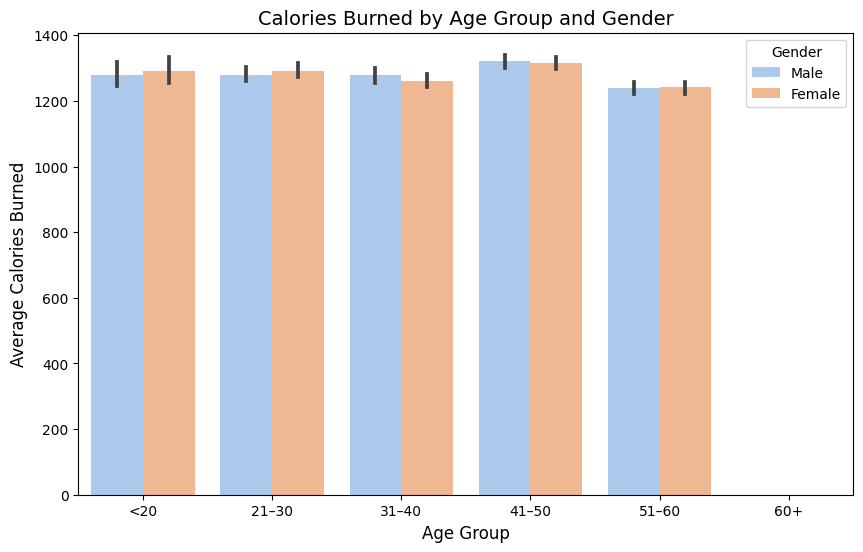

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Age_Group', y='Calories_Burned', hue='Gender', palette='pastel')

plt.title("Calories Burned by Age Group and Gender", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Calories Burned", fontsize=12)
plt.legend(title="Gender")
plt.show()

The visualization and statistical test show **no significant difference** in calories burned between **males and females**.  
This indicates that **gender has little to no effect** on the number of calories burned in this dataset.


In [11]:
df['Gender_Num'] = df['Gender'].map({'Male': 0, 'Female': 1})
correlation = df['Gender_Num'].corr(df['Calories_Burned'])
print("Correlation between Gender and Calories Burned:", correlation)


Correlation between Gender and Calories Burned: -0.0010479912984329655


Based on this correlation alone, gender does not appear to strongly influence calories burned.


 3.3 T-Test (Gender vs Calories)

Testing whether males and females burn significantly different amounts of calories.

In [12]:
from scipy.stats import ttest_ind

male = df[df['Gender']=='Male']['Calories_Burned']
female = df[df['Gender']=='Female']['Calories_Burned']

t_stat, p_val = ttest_ind(male, female)
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: 0.14820102153003278
P-value: 0.8821856198543105


There is no statistically significant difference in calories burned between males and females in our dataset.

## 4.Conclusion

The analysis shows that **neither gender nor age has any significant effect on calories burned**.  
The correlation between age and calories burned is extremely weak (-0.021), while the correlation between gender and calories burned is nearly zero (-0.001).  
A t-test result (P-value = 0.882) confirms that there is **no statistically significant difference** in calories burned between males and females.

Overall, the visualizations and statistical tests indicate that **calorie burn is not influenced by gender or age**.  
This suggests that other factors such as **activity intensity, duration, body weight, and fitness level** are likely the main contributors to differences in calories burned.
